In [ ]:
import torch
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from predictor.utils import make_dataset, plot_pred
from predictor.trainer import DeepAntTrainer
from predictor.model import DeepAntModel

from torch.utils.data import DataLoader, random_split, TensorDataset
from torch.optim import SGD, lr_scheduler

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/TimeSeries/Canadian_climate_history.csv')
dataset.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,NaN,-17.0,0.0,NaN,NaN,-25.6,0.0,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,NaN,-16.7,0.5,NaN,NaN,-20.9,0.0,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,NaN,-12.3,0.0,NaN,NaN,-26.4,0.0,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,NaN,-16.4,0.0,NaN,NaN,-32.5,0.0,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,NaN,-19.5,0.0,NaN,NaN,-26.2,0.0,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [ ]:
subset = dataset[:10000]

In [ ]:
X_train,y_train,X_test,y_test,train_set,test_set = make_dataset(subset, ['MEAN_TEMPERATURE_CALGARY'], 6, 0.7)

In [ ]:
train_data = TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train.astype(np.float32)))
test_data = TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test.astype(np.float32)))

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [ ]:
model = DeepAntModel(6, 1, True)
model.cuda()
loss = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.05)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, patience=6, factor=0.7)
trainer = DeepAntTrainer(model, optimizer, scheduler, loss, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [ ]:
trainer.fit(100, train_loader, test_loader)

Epoch [1/100], TrainLoss: 0.2188, TestLoss: 0.1438, Learning rate = 0.05
Epoch [11/100], TrainLoss: 0.1487, TestLoss: 0.1318, Learning rate = 0.05
Epoch [21/100], TrainLoss: 0.1485, TestLoss: 0.1230, Learning rate = 0.05
Epoch [31/100], TrainLoss: 0.1415, TestLoss: 0.1202, Learning rate = 0.024499999999999997
Epoch [41/100], TrainLoss: 0.1385, TestLoss: 0.1204, Learning rate = 0.01715
Epoch [51/100], TrainLoss: 0.1364, TestLoss: 0.1203, Learning rate = 0.012004999999999998
Epoch [61/100], TrainLoss: 0.1391, TestLoss: 0.1231, Learning rate = 0.008403499999999998
Epoch [71/100], TrainLoss: 0.1404, TestLoss: 0.1208, Learning rate = 0.005882449999999998
Epoch [81/100], TrainLoss: 0.1376, TestLoss: 0.1207, Learning rate = 0.005882449999999998
Epoch [91/100], TrainLoss: 0.1370, TestLoss: 0.1215, Learning rate = 0.004117714999999998


In [ ]:
preds = trainer.predict(test_loader, y_test.shape[0], 16)

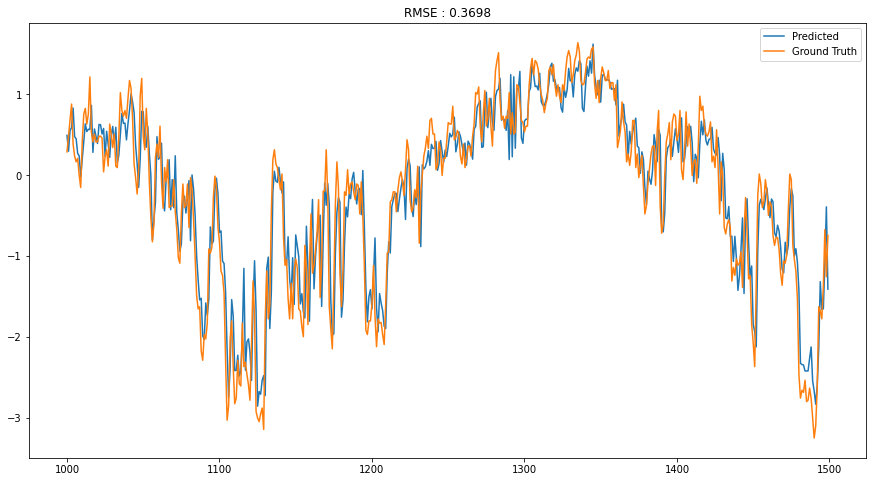

In [ ]:
plot_pred(y_test, preds, 0, np.arange(1000,1500))